***Reference : ** https://pypi.org/project/yfinance/

https://www.geeksforgeeks.org/how-to-calculate-moving-average-in-a-pandas-dataframe/

***Importing libraries :***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import yfinance as yf

In [3]:
msft = yf.Ticker("MSFT")

In [4]:
msft.info

{'zip': '98052-6399',
 'sector': 'Technology',
 'fullTimeEmployees': 181000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. Its Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and desktop solutions; and training and certifica

In [6]:
## get historical market data

msft_data = msft.history(period="max")

In [7]:
msft_data.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.055949,0.064177,0.055949,0.061434,1031788800,0.0,0.0
1986-03-14,0.061434,0.064725,0.061434,0.063628,308160000,0.0,0.0
1986-03-17,0.063628,0.065274,0.063628,0.064725,133171200,0.0,0.0
1986-03-18,0.064725,0.065274,0.062531,0.063079,67766400,0.0,0.0
1986-03-19,0.063079,0.063628,0.061434,0.061982,47894400,0.0,0.0


In [8]:
msft_data.tail(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-03-31,313.899994,315.140015,307.890015,308.309998,33422100,0.0,0.0
2022-04-01,309.369995,310.130005,305.540009,309.420013,27085100,0.0,0.0
2022-04-04,310.089996,315.109985,309.709991,314.970001,24289600,0.0,0.0
2022-04-05,313.269989,314.869995,309.869995,310.880005,23156700,0.0,0.0
2022-04-06,305.190002,307.000000,296.709991,299.500000,40058900,0.0,0.0


In [9]:
### Derive the Open High Low and close from the dataset

columns = ['Open', 'High', 'Low', 'Close']

msft_ohlc = msft_data[columns].__deepcopy__()

In [10]:
msft_ohlc

,Open,High,Low,Close
Date,,,,
1986-03-13,0.055949,0.064177,0.055949,0.061434
1986-03-14,0.061434,0.064725,0.061434,0.063628
1986-03-17,0.063628,0.065274,0.063628,0.064725
1986-03-18,0.064725,0.065274,0.062531,0.063079
1986-03-19,0.063079,0.063628,0.061434,0.061982
...,...,...,...,...
2022-03-31,313.899994,315.140015,307.890015,308.309998
2022-04-01,309.369995,310.130005,305.540009,309.420013
2022-04-04,310.089996,315.109985,309.709991,314.970001


In [11]:
## Converting the data into an array : 
msft_ohlc_arr = np.array(msft_ohlc.__deepcopy__())
ohlc_data= msft_ohlc.__deepcopy__()

ohlc_data

,Open,High,Low,Close
Date,,,,
1986-03-13,0.055949,0.064177,0.055949,0.061434
1986-03-14,0.061434,0.064725,0.061434,0.063628
1986-03-17,0.063628,0.065274,0.063628,0.064725
1986-03-18,0.064725,0.065274,0.062531,0.063079
1986-03-19,0.063079,0.063628,0.061434,0.061982
...,...,...,...,...
2022-03-31,313.899994,315.140015,307.890015,308.309998
2022-04-01,309.369995,310.130005,305.540009,309.420013
2022-04-04,310.089996,315.109985,309.709991,314.970001


In [ ]:
msft_ohlc_arr

In [ ]:
msft_ohlc_arr.__index__

In [ ]:
### Creating a function to add new columns :

def addColumn(data, numOfColumns):
    for _ in range(1, numOfColumns+1):
         x = np.zeros((len(data), 1), dtype=np.float)
         data = np.append(data, x, axis=1)
    return data

In [ ]:
def deleteColumns(data, startColumn_index_pos, numofColumns):
    for _ in range(1, numofColumns+1):
         Data = np.delete(data, startColumn_index_pos, axis=1)

    return Data


In [130]:
def removeRows(data, rowCount):
    data = data.loc[rowCount:,  ]

    return data

In [ ]:
# Data Visualization #

plt.plot(msft_ohlc_arr[-500:, 3], color= 'black', label = 'Closing Price')

plt.grid()
plt.legend()

In [15]:
# Simple Moving average 

def sma(data, lookback_window, closingPrice):
        sma_col_name = f"SMA_{lookback_window}"
        data_df = data.__deepcopy__()
        try :
            data_df[sma_col_name] = data_df.loc[:,closingPrice].rolling(lookback_window).mean()
        except IndexError:
             pass
        data_df.dropna(inplace=True)
        return data_df

In [30]:
def ema(data, lookback_window, closingPrice):
        ema_col_name = f"EMA_{lookback_window}"
        data_df = data.__deepcopy__()
        try :
            data_df[ema_col_name] = data_df.loc[:,closingPrice].ewm(span= lookback_window).mean()
        except IndexError:
             pass
        data_df.dropna(inplace=True)
        return data_df
    

In [40]:
# Calculate cumulative moving average : 
def cma(data, lookback_window, closingPrice):
        cma_col_name = f"CMA_{lookback_window}"
        data_df = data.__deepcopy__()
        try :
            data_df[cma_col_name] = data_df.loc[:,closingPrice].expanding(lookback_window).mean()
        except IndexError:
             pass
        data_df.dropna(inplace=True)
        return data_df

In [63]:
## signal to indicate Buy/Sell of the asset : 
def indicate_buy_sell(data, closingPrice, moving_average):
    data_df = data.__deepcopy__()

    data_df['Buy'] = np.zeros(len(data_df[closingPrice]))
    data_df['Sell'] = np.zeros(len(data_df[closingPrice]))

    closingPrice_index = data_df.columns.get_loc(closingPrice)
    moving_average_index = data_df.columns.get_loc(moving_average)
    buy_index = data_df.columns.get_loc('Buy')
    sell_index = data_df.columns.get_loc('Sell')
    for i in range(len(data_df)):

        if data_df.iloc[i,closingPrice_index] > data_df.iloc[i, moving_average_index] and data_df.iloc[i-1,closingPrice_index] < data_df.iloc[i-1,moving_average_index] :
                data_df.iloc[i,buy_index] = 1

        if data_df.iloc[i, closingPrice_index] < data_df.iloc[i,moving_average_index] and data_df.iloc[i-1,closingPrice_index] > data_df.iloc[i-1,moving_average_index] : 
                data_df.iloc[i, sell_index] = -1
                
    return data_df

In [76]:
def buy_and_hold(data):
    data_df = data.__deepcopy__()
    data_df['buy_return'] = np.zeros(len(data_df))
    data_df['sell_return'] = np.zeros(len(data_df))
    buy_index = data_df.columns.get_loc('Buy')
    sell_index = data_df.columns.get_loc('Sell')

    buy_return_index =  data_df.columns.get_loc('buy_return')
    sell_return_index =  data_df.columns.get_loc('sell_return')

    closingPrice_index = data_df.columns.get_loc('Close')

    for i in range(len(data_df)):

        try :
            if data_df.iloc[i, buy_index] == 1 :
                for j in range(i+1, i+1000):

                    if data_df.iloc[j, buy_index]!=0 or data_df.iloc[j, sell_index]!=0 :
                                data_df.iloc[j, buy_return_index] = (data_df.iloc[j, closingPrice_index] -  data_df.iloc[i, closingPrice_index])

                                break
                    else:
                        continue
            elif data_df.iloc[i, sell_index] == -1:

                for j in range(i+1, i+1000):
                    if data_df.iloc[j, buy_index]!=0 or data_df.iloc[j, sell_index]!=0 :
                        data_df.iloc[j, sell_return_index] = (data_df.iloc[i, closingPrice_index] -  data_df.iloc[j, closingPrice_index])
                        break
                    else:
                        continue
        except IndexError:
            pass

    
    return data_df





In [77]:
# Calculate volalility :

def volalility(data, lookback_window):
    data_df = data.__deepcopy__()
    data_df['volatility'] = np.zeros(len(data_df))

    vol_index = data_df.columns.get_loc('volatility')
    closingPrice_index = data_df.columns.get_loc('Close')

    for i in range(len(data_df)):
        try:
            data_df.iloc[i, vol_index] = data_df.iloc[i- lookback_window +1 :i+1, closingPrice_index].std()

        except IndexError :
            pass
    data_df.dropna(inplace=True)
    return data_df


In [133]:
# Normalization :

def normalize(data, lookback_window):
    data_df = ohlc_data.__deepcopy__()
    data_df.reset_index(inplace=True)
    # closingPrice_index = data_df.columns.get_loc('Close')
    closingPrice_index = "Close"
    data_df['normalize'] = np.zeros(len(data_df))
    # nor_index = data_df.columns.get_loc('normalize')
    nor_index = "normalize"
    for i in range(len(data_df)):

        try:
            data_df.loc[i, nor_index] = (data_df.loc[i, closingPrice_index] - min(data_df.loc[i-lookback_window+1: i+1, closingPrice_index]))/(max(data_df.loc[i-lookback_window+1: i+1, closingPrice_index]) - min(data_df.loc[i-lookback_window+1:i+1, closingPrice_index]))

        except ValueError :
            pass

    data_df.loc[:, nor_index] = data_df.loc[:, closingPrice_index]*100
    data_df = removeRows(data_df, lookback_window)

    return data_df


In [140]:
normalize_sd = normalize(ohlc_data,5)
normalize_sd.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'normalize'], dtype='object')

In [143]:
normalize_sd.reset_index(0)

,index,Date,Open,High,Low,Close,normalize
0,5,1986-03-20,0.061982,0.061982,0.059788,0.060337,6.033697
1,6,1986-03-21,0.060337,0.061434,0.057595,0.058692,5.869153
2,7,1986-03-24,0.058692,0.058692,0.056498,0.057046,5.704608
3,8,1986-03-25,0.057046,0.058143,0.056498,0.058143,5.814303
4,9,1986-03-26,0.058143,0.060337,0.057595,0.059788,5.978845
...,...,...,...,...,...,...,...
9082,9087,2022-03-31,313.899994,315.140015,307.890015,308.309998,30830.999756
9083,9088,2022-04-01,309.369995,310.130005,305.540009,309.420013,30942.001343
9084,9089,2022-04-04,310.089996,315.109985,309.709991,314.970001,31497.000122
9085,9090,2022-04-05,313.269989,314.869995,309.869995,310.880005,31088.000488


In [114]:
# ohlc_data[1,'Close']
data_df = ohlc_data.__deepcopy__()
data_df.reset_index(inplace=True)

In [129]:
data_df.loc[5:,]

,Date,Open,High,Low,Close
5,1986-03-20,0.061982,0.061982,0.059788,0.060337
6,1986-03-21,0.060337,0.061434,0.057595,0.058692
7,1986-03-24,0.058692,0.058692,0.056498,0.057046
8,1986-03-25,0.057046,0.058143,0.056498,0.058143
9,1986-03-26,0.058143,0.060337,0.057595,0.059788
...,...,...,...,...,...
9087,2022-03-31,313.899994,315.140015,307.890015,308.309998
9088,2022-04-01,309.369995,310.130005,305.540009,309.420013
9089,2022-04-04,310.089996,315.109985,309.709991,314.970001
9090,2022-04-05,313.269989,314.869995,309.869995,310.880005


In [116]:
data_df.loc[1, 'Close']

0.06362785398960114

In [78]:
volalility(buy_sell_df, 20)

,Open,High,Low,Close,SMA_20,Buy,Sell,volatility
Date,,,,,,,,
1986-05-07,0.069662,0.070210,0.068565,0.069662,0.067427,0.0,0.0,0.003952
1986-05-08,0.069662,0.070210,0.069113,0.070210,0.067838,0.0,0.0,0.003780
1986-05-09,0.070210,0.070210,0.069662,0.069662,0.068167,0.0,0.0,0.003627
1986-05-12,0.069662,0.071856,0.069662,0.070210,0.068496,0.0,0.0,0.003490
1986-05-13,0.070210,0.071307,0.070210,0.070759,0.068853,0.0,0.0,0.003326
...,...,...,...,...,...,...,...,...
2022-03-31,313.899994,315.140015,307.890015,308.309998,295.559000,0.0,0.0,12.373784
2022-04-01,309.369995,310.130005,305.540009,309.420013,296.537001,0.0,0.0,12.669107
2022-04-04,310.089996,315.109985,309.709991,314.970001,298.340001,0.0,0.0,12.594208


In [72]:
buy_and_hold(buy_sell_df)

,Open,High,Low,Close,SMA_20,Buy,Sell,buy_return,sell_return
Date,,,,,,,,,
1986-04-10,0.061434,0.062531,0.060337,0.061982,0.060776,1.0,0.0,0.000000,0.0
1986-04-11,0.062531,0.064177,0.062531,0.063079,0.060858,0.0,0.0,0.000000,0.0
1986-04-14,0.063079,0.064177,0.063079,0.063628,0.060858,0.0,0.0,0.000000,0.0
1986-04-15,0.063628,0.063628,0.061434,0.063628,0.060803,0.0,0.0,0.000000,0.0
1986-04-16,0.063628,0.066371,0.063079,0.065822,0.060940,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
2022-03-31,313.899994,315.140015,307.890015,308.309998,295.559000,0.0,0.0,0.000000,0.0
2022-04-01,309.369995,310.130005,305.540009,309.420013,296.537001,0.0,0.0,0.000000,0.0
2022-04-04,310.089996,315.109985,309.709991,314.970001,298.340001,0.0,0.0,0.000000,0.0


In [64]:
buy_sell_df  = indicate_buy_sell(test_ma, 'Close', 'SMA_20')
buy_sell_df

,Open,High,Low,Close,SMA_20,Buy,Sell
Date,,,,,,,
1986-04-10,0.061434,0.062531,0.060337,0.061982,0.060776,1.0,0.0
1986-04-11,0.062531,0.064177,0.062531,0.063079,0.060858,0.0,0.0
1986-04-14,0.063079,0.064177,0.063079,0.063628,0.060858,0.0,0.0
1986-04-15,0.063628,0.063628,0.061434,0.063628,0.060803,0.0,0.0
1986-04-16,0.063628,0.066371,0.063079,0.065822,0.060940,0.0,0.0
...,...,...,...,...,...,...,...
2022-03-31,313.899994,315.140015,307.890015,308.309998,295.559000,0.0,0.0
2022-04-01,309.369995,310.130005,305.540009,309.420013,296.537001,0.0,0.0
2022-04-04,310.089996,315.109985,309.709991,314.970001,298.340001,0.0,0.0


In [68]:
buy_sell_df.query('Buy==1').count()

Open      553
High      553
Low       553
Close     553
SMA_20    553
Buy       553
Sell      553
dtype: int64

In [52]:
test_ma.iloc[1,:]

Open      0.062531
High      0.064177
Low       0.062531
Close     0.063079
SMA_20    0.060858
Name: 1986-04-11 00:00:00, dtype: float64

In [53]:
test_ma.iloc[1, 3]

0.0630793571472168

In [41]:
test_cma = cma(ohlc_data, 20, 'Close')

test_cma.tail(5)

,Open,High,Low,Close,CMA_20
Date,,,,,
2022-03-31,313.899994,315.140015,307.890015,308.309998,36.406943
2022-04-01,309.369995,310.130005,305.540009,309.420013,36.436981
2022-04-04,310.089996,315.109985,309.709991,314.970001,36.467623
2022-04-05,313.269989,314.869995,309.869995,310.880005,36.497808
2022-04-06,305.190002,307.000000,296.709991,299.500000,36.526735


<AxesSubplot:xlabel='Date'>

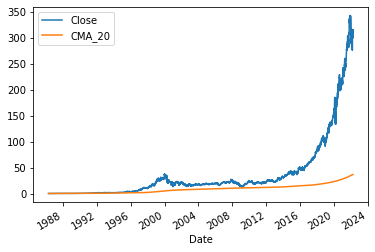

In [42]:
test_cma[['Close', 'CMA_20']].plot()

In [38]:
## Calling a 20 -period Moving average function based on closing price(index = 3 ) and to be populated on the fifth column ( index = 4)

# sma(ohlc_data, 20 , 3, 'SMA')


test_ma = sma(ohlc_data, 20, 'Close')
test_ma.tail(20)

,Open,High,Low,Close,SMA_20
Date,,,,,
2022-03-10,283.019989,286.600006,280.579987,285.589996,291.851930
2022-03-11,287.959991,289.510010,279.429993,280.070007,290.767627
2022-03-14,280.339996,285.399994,275.820007,276.440002,289.868066
2022-03-15,280.350006,287.820007,278.730011,287.149994,289.506001
2022-03-16,289.109985,294.570007,283.200012,294.390015,289.233002
2022-03-17,293.290009,295.609985,289.369995,295.220001,289.019002
2022-03-18,295.369995,301.000000,292.730011,300.429993,289.504001
2022-03-21,298.890015,300.140015,294.899994,299.160004,290.065501
2022-03-22,299.799988,305.000000,298.769989,304.059998,290.882501


<AxesSubplot:xlabel='Date'>

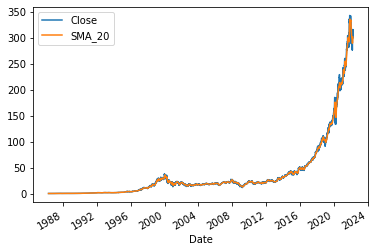

In [20]:
test_ma[['Close', 'SMA_20']].plot()

In [31]:
test_ema = ema(ohlc_data, 20, 'Close')

In [37]:
test_ema.tail(20)

,Open,High,Low,Close,EMA_20
Date,,,,,
2022-03-10,283.019989,286.600006,280.579987,285.589996,292.080242
2022-03-11,287.959991,289.510010,279.429993,280.070007,290.936410
2022-03-14,280.339996,285.399994,275.820007,276.440002,289.555800
2022-03-15,280.350006,287.820007,278.730011,287.149994,289.326675
2022-03-16,289.109985,294.570007,283.200012,294.390015,289.808898
2022-03-17,293.290009,295.609985,289.369995,295.220001,290.324241
2022-03-18,295.369995,301.000000,292.730011,300.429993,291.286694
2022-03-21,298.890015,300.140015,294.899994,299.160004,292.036533
2022-03-22,299.799988,305.000000,298.769989,304.059998,293.181625


<AxesSubplot:xlabel='Date'>

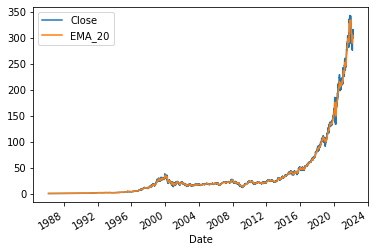

In [34]:
test_ema[['Close', 'EMA_20']].plot()